In [1]:
%load_ext autoreload
%autoreload 2
# %matplotlib widget
import brian2 as b2
import slab as s
from consts import Paths
from pathlib import Path
import matplotlib.pyplot as plt
from analyze.report import generate_single_result
hrtf_paths = list(Path(Paths.SOFA_DIR).iterdir())
print(hrtf_paths)

2024-12-16 11:53:22,825 [INFO ]  

>>>>> start execution
[PosixPath('../data/SOFA/dtf_nh156.sofa'), PosixPath('../data/SOFA/dtf_las_nh1012.sofa'), PosixPath('../data/SOFA/hrtf b_nh15.sofa'), PosixPath('../data/SOFA/RIEC_hrir_subject_057.sofa')]



              -- N E S T --
  Copyright (C) 2004 The NEST Initiative

 Version: 3.8.0
 Built: Aug 27 2024 04:33:06

 This program is provided AS IS and comes with
 NO WARRANTY. See the file LICENSE for details.

 Problems or suggestions?
   Visit https://www.nest-simulator.org

 Type 'nest.help()' to find out more about NEST.

2024-12-16 11:53:23,120 [DEBUG]  genenerating spikes for {'sound': <utils.custom_sounds.WhiteNoise object at 0x7f7bbb8eca10>, 'angle': -45, 'plot_spikes': True, 'subj_number': 'headless'}
2024-12-16 11:53:23,207 [DEBUG]  binaural sound post hrtf level=[80.         79.97677912]
2024-12-16 11:53:23,207 [DEBUG]  binaural sound post noise level=[80.         79.97677912]
2024-12-16 11:53:23,208 [INFO ]  generating simulated IHC response...
2024-12-16 11:53:23,208 [DEBUG]  working on ear L...


IHCsim: 100%|██████████| 10/10 [00:08<00:00,  1.11it/s]


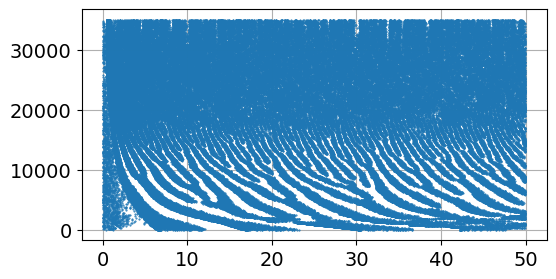

2024-12-16 11:53:32,526 [DEBUG]  working on ear R...


IHCsim: 100%|██████████| 10/10 [00:08<00:00,  1.12it/s]


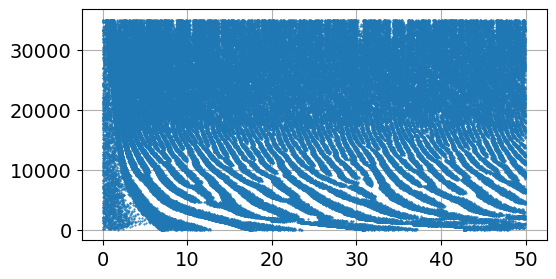

2024-12-16 11:53:41,634 [INFO ]  generation complete.


In [2]:
import brian2 as b2
import brian2hears as b2h
import nest
import numpy as np
from brian2 import *
from brian2hears import *

from cochleas.anf_utils import load_anf_response
from cochleas.GammatoneCochlea import sound_to_spikes as s2sGamm
from cochleas.TanCarneyCochlea import sound_to_spikes
from models.InhModel.params import Parameters as InhParam
from utils.custom_sounds import Tone, WhiteNoise
plt.close()
nest.set_verbosity("M_ERROR")

sound = WhiteNoise(50 * b2.ms, 80 * b2h.dB)
ANGLE = -45
params = InhParam()
# spikes_tc = s2sGamm.call(sound, ANGLE, params.cochlea["gammatone"], True)
spikes_real = sound_to_spikes.call(sound, ANGLE, params.cochlea["TanCarney"], True)


### Show spikes for a specific population/with a specific title

In [3]:
from analyze.report import (
    draw_rate_vs_angle,
    generate_multi_inputs_single_net,
    draw_single_angle_histogram,
)
import dill

POP = 'MSO'

for sel in [
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&higherrateMSO/2024-11-15T11:48:24&tone_100.Hz_70dB&gammatone&withICC&higherrateMSO.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T16:36:48&tone_0.5kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T16:41:34&tone_0.8kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T16:45:33&tone_1.kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T17:07:45&tone_5.kHz_70dB&gammatone&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T17:12:08&tone_10.kHz_70dB&gammatone&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:30:45&tone_100.Hz_70dB&TanCarney&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:35:41&tone_0.5kHz_70dB&TanCarney&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:41:05&tone_0.8kHz_70dB&TanCarney&withICC&final.pic",
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T15:57:58&tone_1.kHz_70dB&TanCarney&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T17:16:44&tone_5.kHz_70dB&TanCarney&withICC&final.pic",
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&final/2024-11-15T17:21:29&tone_10.kHz_70dB&TanCarney&withICC&final.pic",
]:
    with open(sel, "rb") as f:
        res = dill.load(f)
        fig = draw_rate_vs_angle(
            res,
            f"",
            # f"MSO spikes for tone {res['basesound'].frequency}, $\Delta t_{'{'}inhi{'}'}=-0.4ms$,$\Delta t_{'{'}inhc{'}'}=0.2ms$",
            rate=False,
            show_pops=[POP],
            # ylim=[15000,30000]
            # ylim=[0,3100],
            show_hist=False
        )
        # fig = draw_single_angle_histogram(
        #     res,
        #     angle=0,
        #     fontsize=15
        #     # population=SBC"
        # )
        fig.show()
        fig.savefig(
            f"/home/paolo/Documents/school/master/polimi/thesis/polithesis/manuscript/pres/highresnew/{res["conf"]["cochlea_type"]}-{POP}-{res['basesound'].frequency}-nohist.png",
            # f"/home/paolo/Documents/school/master/polimi/thesis/polithesis/manuscript/pres/highresnew/SBC-example.png",
            transparent=True,
            dpi=600,
        )
        del res

2024-12-16 11:53:44,282 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:44,283 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 18.60it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


2024-12-16 11:53:44,780 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:44,781 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 14.85it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


2024-12-16 11:53:45,282 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:45,282 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 18.95it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


2024-12-16 11:53:45,749 [DEBUG]  {'title': '', 'show_pops': ['MSO'], 'rate': False, 'hist_logscale': True}
2024-12-16 11:53:45,749 [DEBUG]  simulation time=200. ms


pop: 100%|██████████| 1/1 [00:00<00:00, 18.05it/s]
WARNING    /tmp/ipykernel_12546/4029643018.py:42: UserWarning:FigureCanvasAgg is non-interactive, and thus cannot be shown
 [py.warnings]


### show best ITD for all MSO neurons for a specific input

neur of interest is 119409, which is the one spiking the most at 15


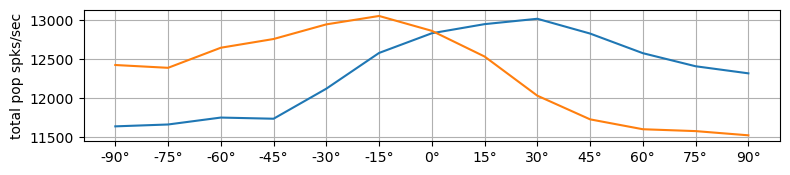

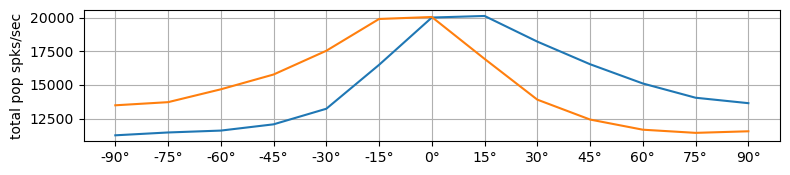

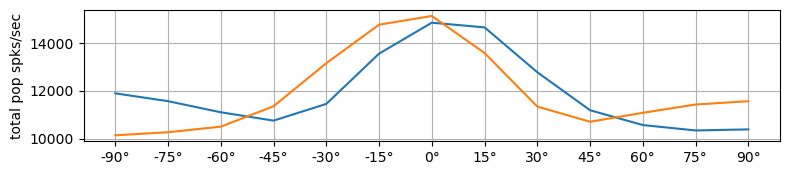

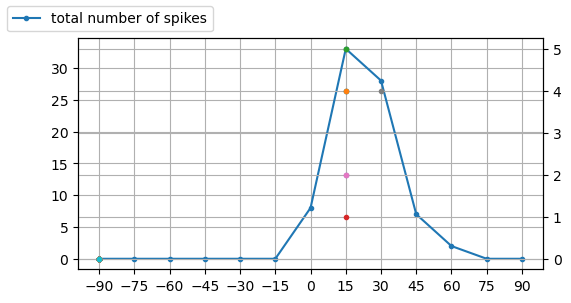

In [4]:
from collections import defaultdict
from analyze.report import draw_rate_vs_angle, generate_multi_inputs_single_net
import dill
import numpy as np

plt.close()


def spikest_neuron(d):
    times = d["times"]
    senders = d["senders"]
    id2spike = defaultdict(int)
    for i in senders:
        id2spike[i] += 1
    max_spikes = max(list(id2spike.values()))

    spikiest_neur = list(id2spike.keys())[np.argmax(list(id2spike.values()))]
    return spikiest_neur, max_spikes


def single_neuron_rate(data, check_angle=30):
    a2r = data["angle_to_rate"]
    angles = list(a2r.keys())
    fig, ax = plt.subplots(1, 1)
    num_neur = []
    num_spike = []
    neur2spikebyangle = defaultdict(list)
    single_neur_spike = []
    relevant_neuron, spikes = spikest_neuron(a2r[check_angle]["L"]["MSO"])
    relevant_neurons = [
        relevant_neuron,
        relevant_neuron + 1,
        relevant_neuron + 2,
        relevant_neuron + 3,
        relevant_neuron + 4,
        relevant_neuron + 5,
    ]
    relevant_neurons = a2r[0]['L']['MSO']['global_ids']

    for angle in angles:
        d = a2r[angle]["L"]["MSO"]
        times = d["times"]
        senders = d["senders"]
        num_neur.append(len(set(senders)))
        num_spike.append(len(times))
        id2spike = defaultdict(int)
        for i in senders:
            id2spike[i] += 1
        for n in relevant_neurons:
            neur2spikebyangle[n].append(id2spike[n])
    ax.plot(angles, num_spike, ".-", label="total number of spikes")
    fig.legend(loc='upper left')

    ax2 = ax.twinx()
    for n, spikes in neur2spikebyangle.items():
        # ax2.plot(angles, spikes, ".-", label=f"spikes neur of interest {n}")
        angle_max_spikes = angles[np.argmax(spikes)]
        ax2.plot(angle_max_spikes, max(spikes), ".-", label=f"spikes neur of interest {n}")
    ax.set_xticks(angles)
    # fig.legend()
    print(
        f"neur of interest is {relevant_neuron}, which is the one spiking the most at {check_angle}"
    )
    plt.show()


for sel in [
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&ppg&ppgcheck/2024-11-17T13:13:09&tone_100.Hz_70dB&ppg&withICC&ppgcheck.pic"
    # "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&TanCarney&crazystronginh/2024-11-16T23:41:04&tone_0.5kHz_70dB&TanCarney&withICC&crazystronginh.pic"
]:
    with open(sel, "rb") as f:
        res = dill.load(f)
        single_neuron_rate(res, 15)
# best results with SBC 10, but they do not correspond to our metric

### Plot single scatterplot

In [ ]:
import brian2 as b2
import brian2hears as b2h
import nest
import numpy as np
from brian2 import *
from brian2hears import *

from cochleas.anf_utils import load_anf_response
from cochleas.GammatoneCochlea import sound_to_spikes as s2sGamm
from cochleas.TanCarneyCochlea import sound_to_spikes
from models.InhModel.params import Parameters as InhParam
from utils.custom_sounds import Tone, WhiteNoise

nest.set_verbosity("M_ERROR")

sound = WhiteNoise(100 * b2.ms, 80 * b2h.dB)
ANGLE = -90
params = InhParam()

# spikes_tc = s2sGamm.call(sound, ANGLE, params.cochlea["gammatone"], True)
spikes_real = sound_to_spikes.call(sound, ANGLE, params.cochlea["TanCarney"], True)

### Plot ITD and ILD derived from HRTF effect, for various HRTF and various frequencies

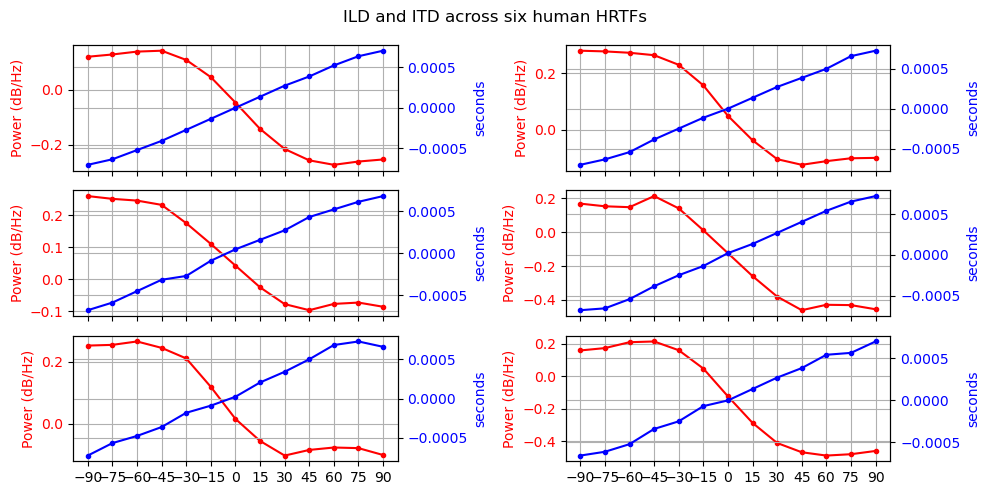

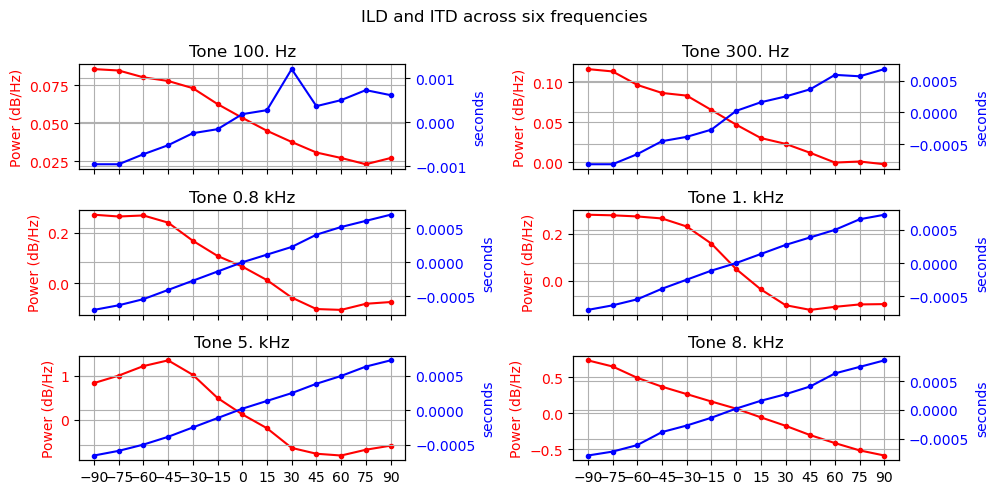

In [5]:
from analyze import sound_analysis as SA
from cochleas.GammatoneCochlea import run_hrtf
from utils.custom_sounds import Tone
from utils.log import logger
import logging


def draw_ITD_ILD(tone, angles, ild, subj_number, title=None):
    prev_level = logger.level
    logger.setLevel(logging.WARNING)
    # itd and ild functions are VERY verbose
    angle_to_ild = {}
    angle_to_itd = {}
    for angle in angles:
        binaural_sound = run_hrtf(
            tone,
            angle,
            subj_number,
        )
        left = binaural_sound.left
        right = binaural_sound.right
        angle_to_itd[angle] = SA.itd(left, right)
        ild_res, all_freq_diff = SA.ild(left, right, tone.sound)
        angle_to_ild[angle] = ild_res

        # total_diff = np.sum(all_freq_diff)
    ild.set_ylabel("Power (dB/Hz)", color="r")
    ild.plot(
        angles,
        [angle_to_ild[angle] for angle in angles],
        label="ILD",
        marker=".",
        color="r",
    )
    ild.tick_params(axis="y", labelcolor="r")
    itd = ild.twinx()
    itd.set_ylabel("seconds", color="b")
    itd.plot(
        angles,
        [angle_to_itd[angle] for angle in angles],
        label="ITD",
        marker=".",
        color="b",
    )
    itd.tick_params(axis="y", labelcolor="b")
    if title is not None:
        ild.set_title(title)
    plt.setp([ild, itd], xticks=angles)
    logger.level = prev_level
    return


from typing import Iterable


def flatten(items):
    """Yield items from any nested iterable.
    from https://stackoverflow.com/a/40857703
    """
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            yield from flatten(x)
        else:
            yield x


def wrap_to_avoid_polluting():
    plt.close()
    fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 5))
    axs = flatten(axs)
    tone = Tone(1000 * b2.Hz)
    angles = list(range(-90, 91, 15))
    for ax, subj_number in zip(axs, [0, 1, 2, 4, 5, 6, 7]):  # avoid 3 because it SUCKS
        draw_ITD_ILD(tone, angles, ax, subj_number)
    fig.suptitle("ILD and ITD across six human HRTFs")
    fig.tight_layout()
    fig, axs = plt.subplots(3, 2, sharex=True, figsize=(10, 5))
    axs = flatten(axs)
    frequencies = [100, 300, 800, 1000, 5000, 8000] * b2.Hz
    tones = [Tone(i) for i in frequencies]
    angles = list(range(-90, 91, 15))
    for ax, tone, freq in zip(axs, tones, frequencies):
        draw_ITD_ILD(tone, angles, ax, 1, title=f"Tone {freq}")
    fig.suptitle("ILD and ITD across six frequencies")
    fig.tight_layout()


wrap_to_avoid_polluting()

In [6]:

from analyze.report import generate_network_vis
from pathlib import Path
import dill

sel = Path(
    "/home/paolo/Documents/school/master/polimi/thesis/polithesis/results/produce_for_thesis/withICC&gammatone&final/2024-11-15T17:12:08&tone_10.kHz_70dB&gammatone&withICC&final.pic"
)
print(sel.name.replace('.pic', '.png'))

with open(sel, "rb") as f:
    res = dill.load(f)
    generate_network_vis(res, sel.parent / sel.name.replace('.pic', '.png'))

2024-11-15T17:12:08&tone_10.kHz_70dB&gammatone&withICC&final.png


In [7]:
hrtf = s.HRTF(hrtf_paths[2])
# print(hrtf.n_sources)
# fig, ax = plt.subplots(2)
# sourceidx = hrtf.cone_sources(0)
# ax[0].set_title("waterfall plot")
# ax[1].set_title("image plot")
# hrtf.plot_tf(sourceidx, ear='left', axis=ax[0], show=False, kind="waterfall")
# hrtf.plot_tf(sourceidx, ear='left', axis=ax[1], show=False, kind="image")
# plt.tight_layout()
# plt.show()


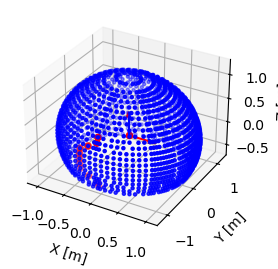

In [8]:
import brian2 as b2
import brian2hears as b2h
from utils.custom_sounds import Tone
import numpy as np
plt.close()
hrtf = s.HRTF(hrtf_paths[2])
# hrtf = s.HRTF.kemar()
input = Tone(100 * b2.Hz, 100 * b2.ms)


sourceidx = hrtf.cone_sources(-55, False)
hrtf.plot_sources(sourceidx)

# bin = hrtf.apply(sourceidx, s.Sound(input.sound))


# res = s.HRTF(hrtf_paths[2]).interpolate(-45,0).apply(s.Sound(input.sound).resample())
# print(res)


In [9]:
# next try SOFAR it seems integrated with pyfar